In [1]:
import numpy as np
import pandas as pd
import tifffile as tiff
from matplotlib import cm
import seaborn as sns
sns.set_style("white")
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import sys
sys.path.append('/home/Repos/')

import tracePy.TracePy as tp

In [2]:
import imp
imp.reload(tp)

<module 'tracePy.TracePy' from '/home/Repos/tracePy/TracePy.py'>

In [3]:
trace_path = '/home/Data/Ran/C4/C4.traces'
stack_path = '/home/Data/Ran/C4/C4stack.tif'

In [4]:
df, meta = tp.read_trace(trace_path)
soma = tp.detect_soma(stack_path)

# zm, xm, ym = np.ma.where(soma.mask)
# soma_coords = np.array([xm, ym, zm]).T
soma_coords = np.roll(np.asarray(np.column_stack(np.where(soma.mask))), 2,  axis=1)

Reconstructing Soma with Simple Mask


# Tracing one ROI back to soma

In [5]:
imp.reload(tp)
ROI = np.array([335,  32,  51])
# threshold = 3
closest_path_id_arr, closest_points_arr, connected_paths_id_arr, poc_processed, path_processed = tp.find_trace_to_soma(ROI, soma_coords, df)

# print('\nthe closest path from the ROI', closest_path_id_arr, 
#       '\nthe closest point on that path', closest_points_arr, 
#       '\nall the paths connected to the paths along', connected_paths_id_arr,
#       '\nall the paths in front of the starting point', path_processed,
#       '\nall the points on the paths in fron of the starting point', poc_processed,
#       )

The ROI ([335  32  51]) is on the 7th branch from soma


# Plot

<IPython.core.display.Javascript object>


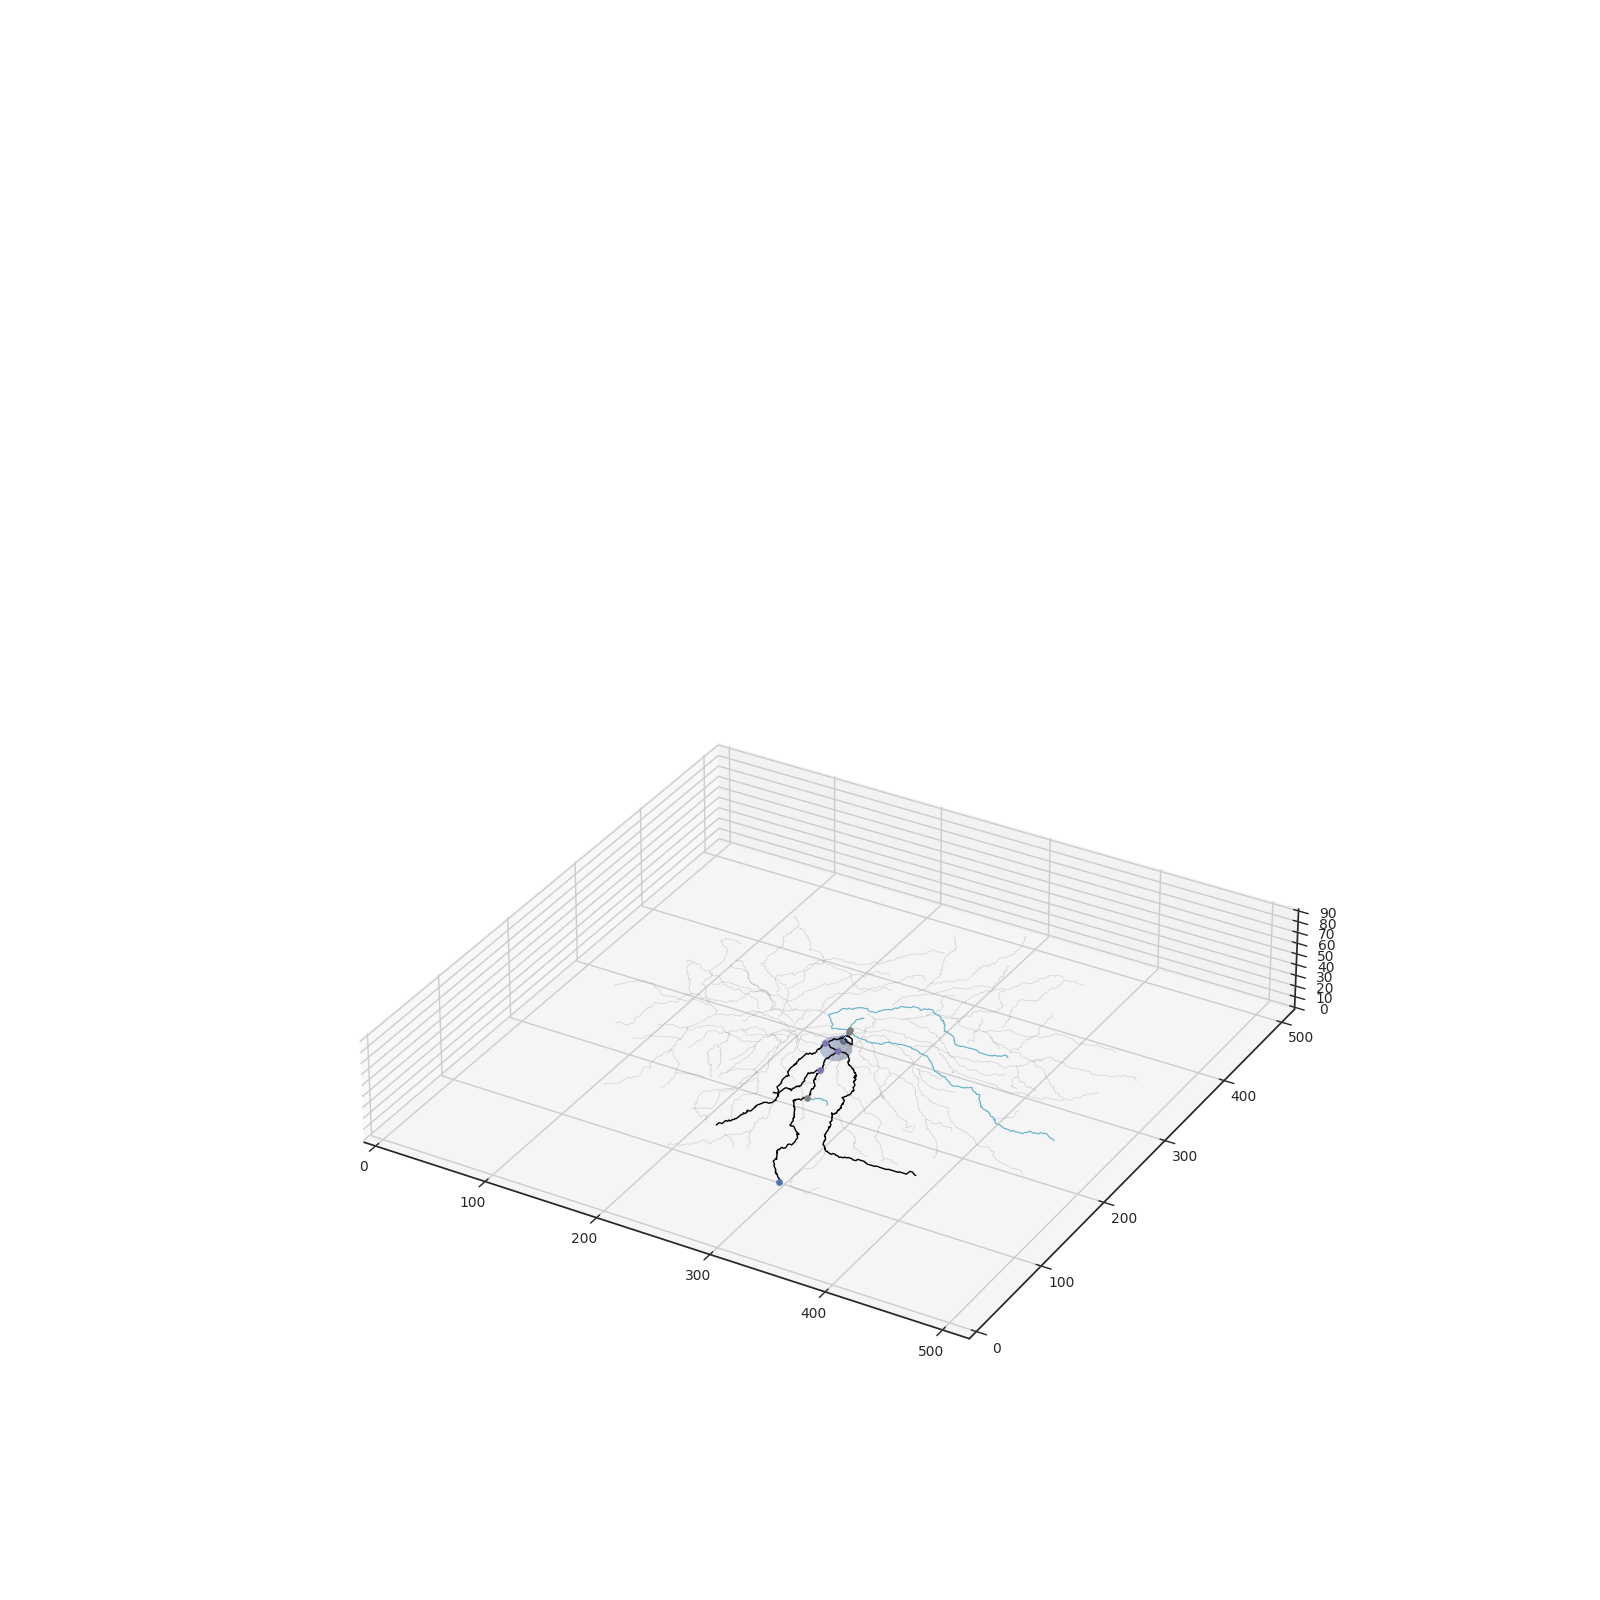

In [6]:
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

# palette = itertools.cycle(sns.color_palette())
palette = sns.color_palette()
# set axes scale
ax.pbaspect = [1,1,90/512]
ax.set_xlim3d(left=0, right=512)
ax.set_ylim3d(bottom=0, top=512)
ax.set_zlim3d(bottom=0, top=90)


# soma
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = soma.radius * 1.5 * np.cos(u)*np.sin(v) + soma.centroid[1]
y = soma.radius * 1.5 *np.sin(u)*np.sin(v) + soma.centroid[2]
z = soma.radius *np.cos(v) + soma.centroid[0]
ax.plot_surface(x, y, z, color=palette[0], alpha=0.2)

path_list = np.unique(df['id'].tolist()).astype(int)
for path in path_list:
    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], linewidth=0.5, c='grey', alpha=0.3)

# ROI
ax.scatter(closest_points_arr[0][0], closest_points_arr[0][1], closest_points_arr[0][2], color=palette[0])

# the shortest path to the soma
for i, path in enumerate(closest_path_id_arr): 
    
    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c='black', linewidth=1)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c=palette[3])

# ax.set_xticks([]) 
# ax.set_yticks([]) 
# ax.set_zticks([])
# # all the connected neurites in the shortest path to the soma
for j, path in enumerate(path_processed):

    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c=palette[5], linewidth=0.8)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c='grey')


# Get the distance and nodes between two ROIs (no intersection)

In [7]:
imp.reload(tp)
ROI1 = np.array([335,  32,  51]) # on path 9 
closest_path_id_arr1, closest_points_arr1, connected_paths_id_arr1, poc_processed1, path_processed1 = tp.find_trace_to_soma(ROI1, soma_coords, df)
ROI2 = np.array([204, 222,  45]) # on path 46
closest_path_id_arr2, closest_points_arr2, connected_paths_id_arr2, poc_processed2, path_processed2 = tp.find_trace_to_soma(ROI2, soma_coords, df)

The ROI ([335  32  51]) is on the 7th branch from soma
The ROI ([204 222  45]) is on the 2nd branch from soma.


In [8]:
imp.reload(tp)
tp.distance_between_two_ROIs(ROI1, ROI2, poc_processed1, poc_processed2, soma_coords, df)


ROI1 and ROI2 is not intersected.

The length of the neurite between ROI 1 ([335  32  51]) and ROI 2 ([204 222  45]) is 252.421µm,
and there are 10 nodes between them.



(252.4208634582352, 10)

# Plot

<IPython.core.display.Javascript object>


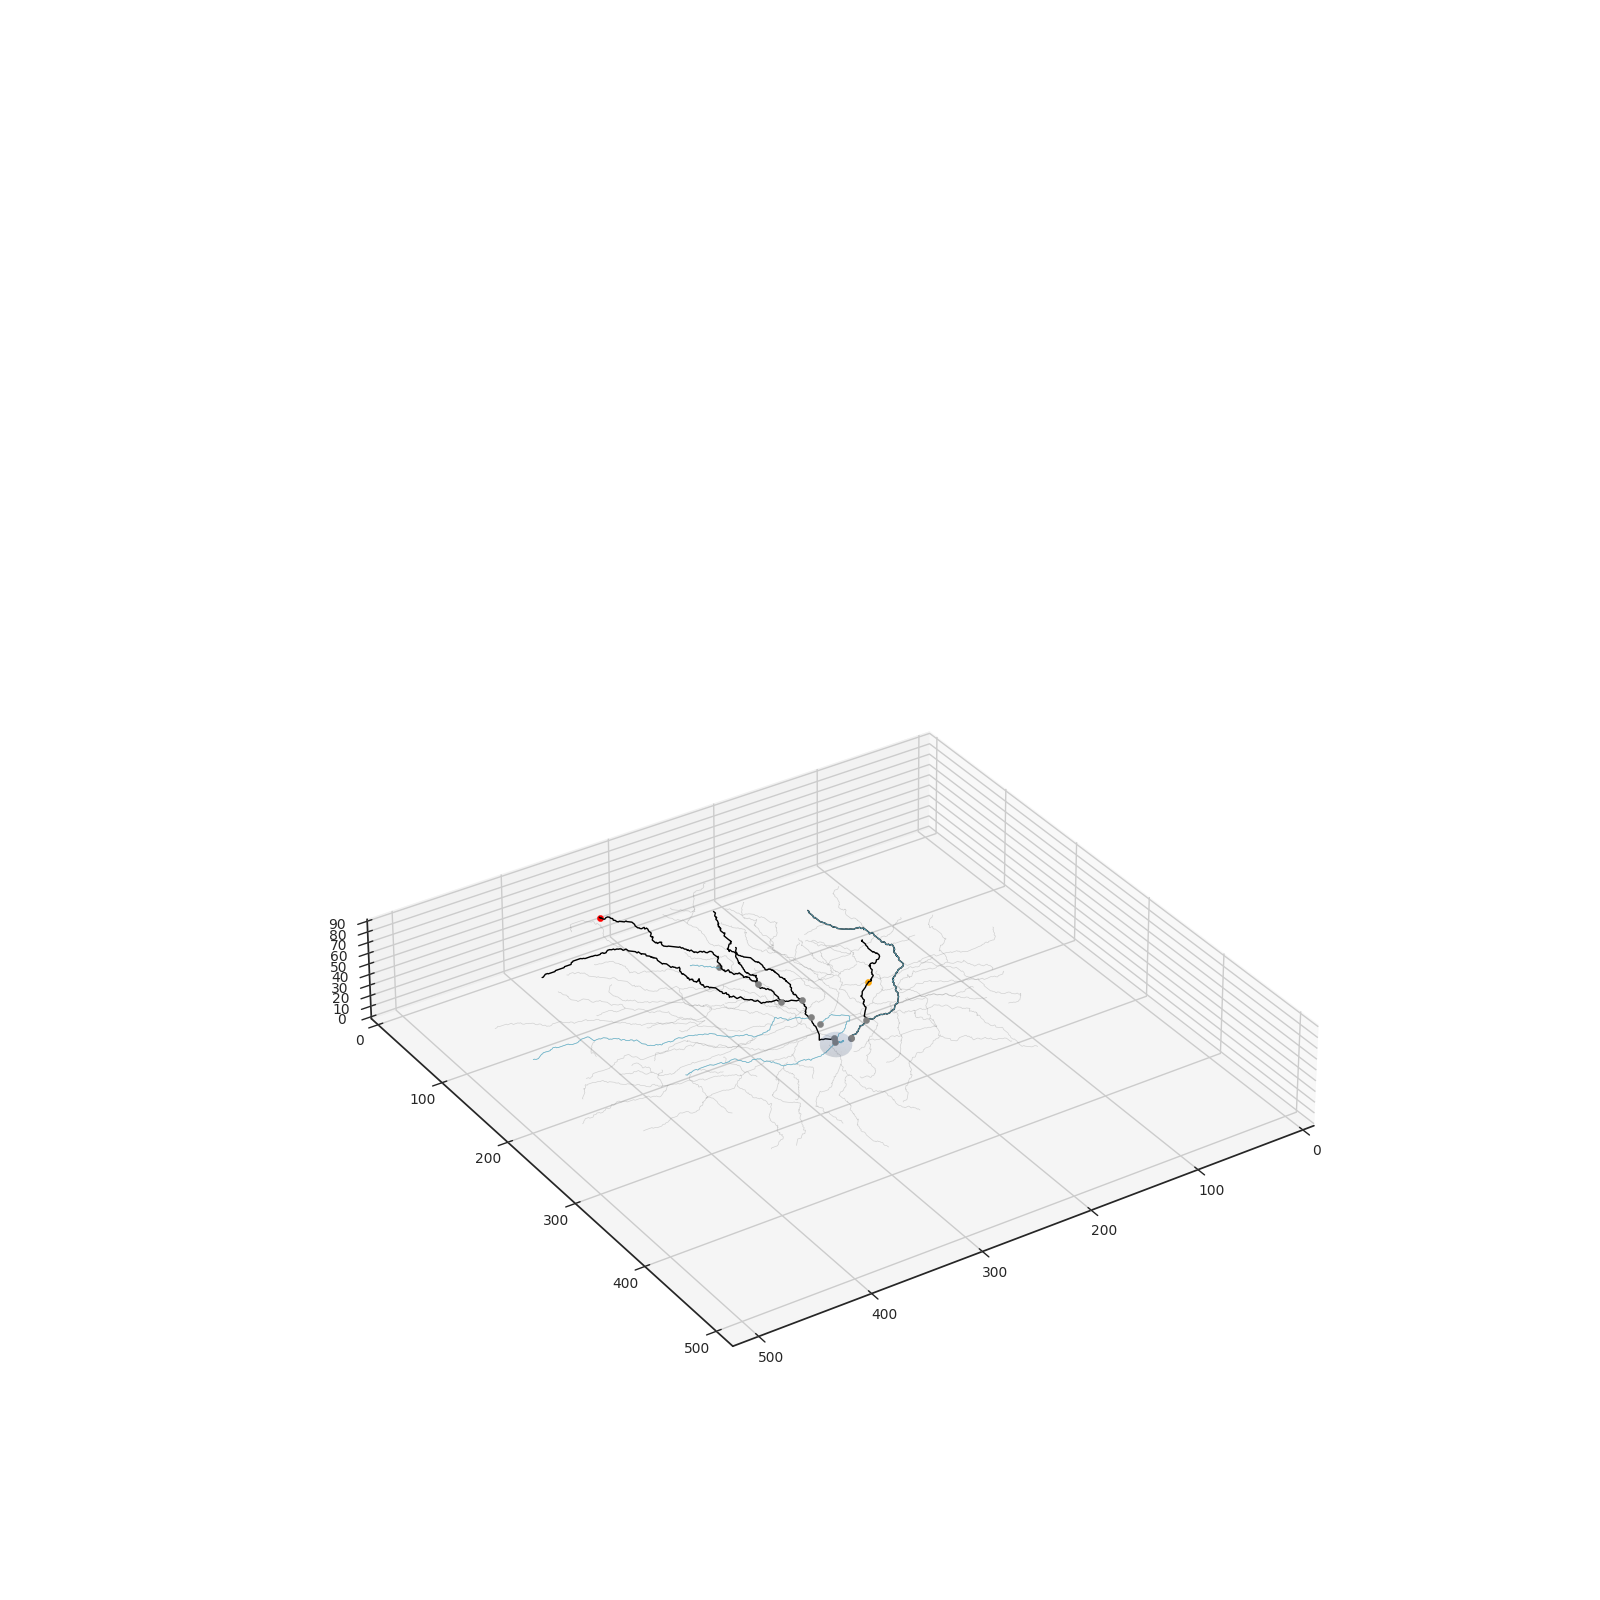

In [9]:
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')
palette = sns.color_palette()

# set axes scale
ax.set_xlim3d(left=0, right=512)
ax.set_ylim3d(bottom=0, top=512)
ax.set_zlim3d(bottom=0, top=90)
ax.pbaspect = [1,1,90/512]

# soma
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = soma.radius * 1.5 * np.cos(u)*np.sin(v) + soma.centroid[1]
y = soma.radius * 1.5 *np.sin(u)*np.sin(v) + soma.centroid[2]
z = soma.radius *np.cos(v) + soma.centroid[0]
ax.plot_surface(x, y, z, color=palette[0], alpha=0.1)

path_list = np.unique(df['id'].tolist()).astype(int)
for path in path_list:
    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], linewidth=0.5, c='grey', alpha=0.3)

# the calibrated ROI coordinates
ax.scatter(closest_points_arr1[0][0], closest_points_arr1[0][1], closest_points_arr1[0][2], color='red')
ax.scatter(closest_points_arr2[0][0], closest_points_arr2[0][1], closest_points_arr2[0][2], color='orange')
# ax.scatter(closest_points_arr[0][0], closest_points_arr[0][1], closest_points_arr[0][2], color='brown')

# the shortest path to the soma
for i, path in enumerate(closest_path_id_arr1): 
    
    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c='black', linewidth=1)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c='grey')

# all the connected neurites in the shortest path to the soma
for j, path in enumerate(path_processed1):

    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c=palette[5] , linewidth=0.5)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c='grey')

for i, path in enumerate(closest_path_id_arr2): 
    
    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c='black', linewidth=1)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c='grey')

# all the connected neurites in the shortest path to the soma
for j, path in enumerate(path_processed2):

    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c=palette[5], linewidth=0.5)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c='grey')

# Get the distance and nodes between two ROIs (intersected)

In [10]:
imp.reload(tp)
ROI1 = np.array([335,  32,  51]) # on path 9
closest_path_id_arr1, closest_points_arr1, connected_paths_id_arr1, poc_processed1, path_processed1 = tp.find_trace_to_soma(ROI1, soma_coords, df)
ROI2 = np.array([322, 167,  53]) # on path ?
closest_path_id_arr2, closest_points_arr2, connected_paths_id_arr2, poc_processed2, path_processed2 = tp.find_trace_to_soma(ROI2, soma_coords, df)

The ROI ([335  32  51]) is on the 7th branch from soma
The ROI ([322 167  53]) is on the 6th branch from soma


In [11]:
imp.reload(tp)
tp.distance_between_two_ROIs(ROI1, ROI2, poc_processed1, poc_processed2, soma_coords, df)


ROI1 and ROI2 is intersected.

The length of the neurite between ROI 1 ([335  32  51]) and ROI 2 ([322 167  53]) is 262.070µm,
and there are 4 nodes between them.



(262.06992097116, 4)

<IPython.core.display.Javascript object>


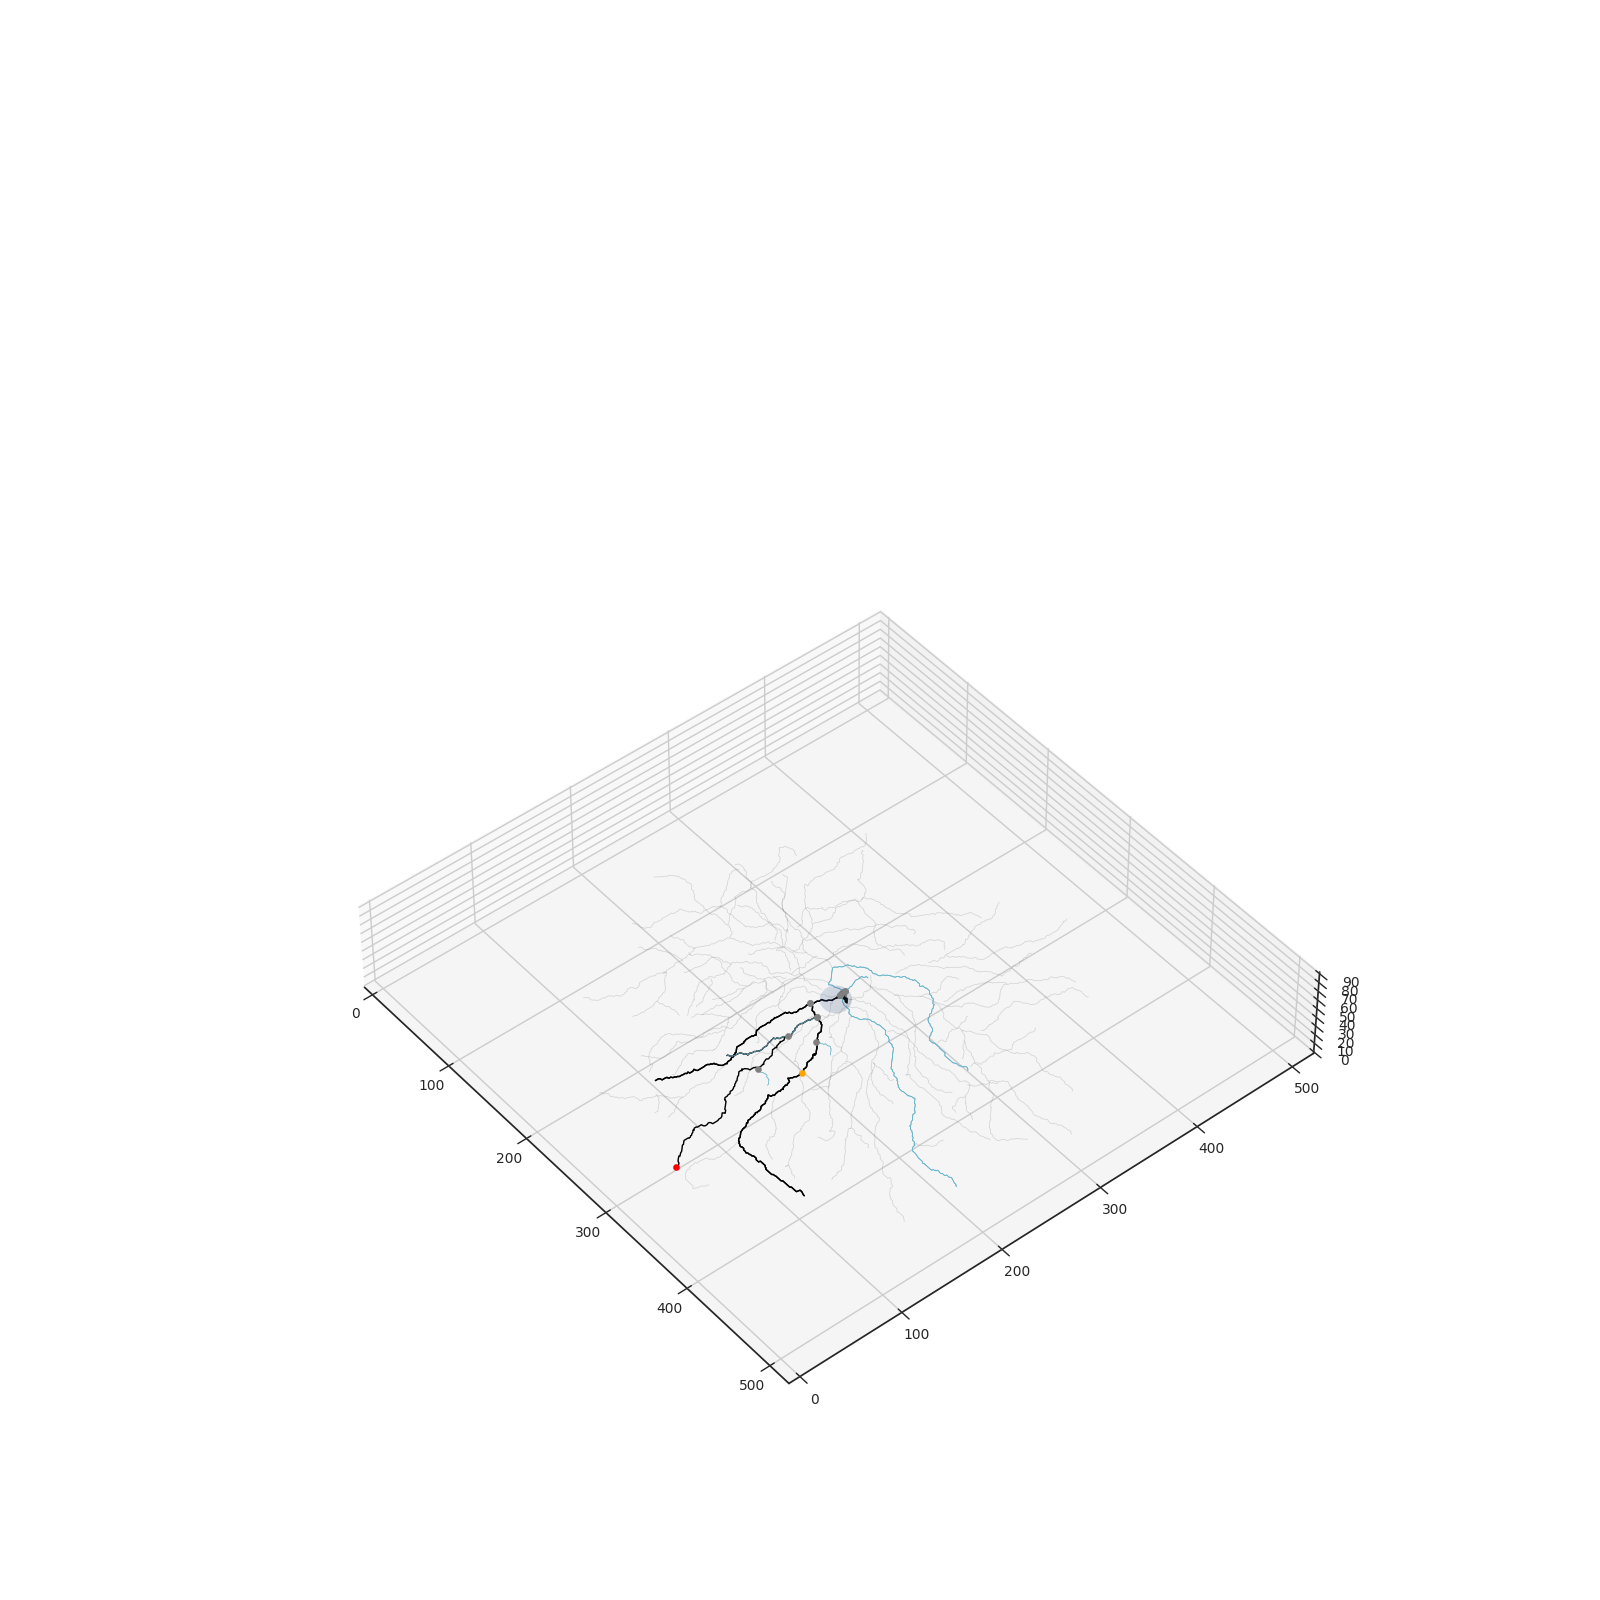

In [12]:
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')
palette = sns.color_palette()

# set axes scale
ax.set_xlim3d(left=0, right=512)
ax.set_ylim3d(bottom=0, top=512)
ax.set_zlim3d(bottom=0, top=90)
ax.pbaspect = [1,1,90/512]

# soma
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = soma.radius * 1.5 * np.cos(u)*np.sin(v) + soma.centroid[1]
y = soma.radius * 1.5 *np.sin(u)*np.sin(v) + soma.centroid[2]
z = soma.radius *np.cos(v) + soma.centroid[0]
ax.plot_surface(x, y, z, color=palette[0], alpha=0.1)

path_list = np.unique(df['id'].tolist()).astype(int)
for path in path_list:
    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], linewidth=0.5, c='grey', alpha=0.3)

# the calibrated ROI coordinates
ax.scatter(closest_points_arr1[0][0], closest_points_arr1[0][1], closest_points_arr1[0][2], color='red')
ax.scatter(closest_points_arr2[0][0], closest_points_arr2[0][1], closest_points_arr2[0][2], color='orange')
# ax.scatter(closest_points_arr[0][0], closest_points_arr[0][1], closest_points_arr[0][2], color='brown')

# the shortest path to the soma
for i, path in enumerate(closest_path_id_arr1): 
    
    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c='black', linewidth=1)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c='grey')

# all the connected neurites in the shortest path to the soma
for j, path in enumerate(path_processed1):

    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c=palette[5] , linewidth=0.5)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c='grey')

for i, path in enumerate(closest_path_id_arr2): 
    
    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c='black', linewidth=1)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c='grey')

# all the connected neurites in the shortest path to the soma
for j, path in enumerate(path_processed2):

    path_coords = tp.get_coords(df, path)
    ax.plot(path_coords[:, 0], path_coords[:, 1], path_coords[:, 2], c=palette[5], linewidth=0.5)
    ax.scatter(path_coords[0, 0], path_coords[0, 1], path_coords[0, 2], c='grey')